# Into to Scikit-Learn (sklearn)

Structure:
0. An end to end sklearn workflow
1. Getting the data ready
2. Choose the right estimator/algo for our problems
3. Fit model/algo and use it to make predictions
4. Evaluate the model
5. Improve the model
6. Save and load a trained model
7. Putting it all together!

## 0. An end to end sklearn workflow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart_disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create Y 
y = heart_disease["target"]

In [11]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble  import RandomForestClassifier
clf = RandomForestClassifier(n_entimators = 100)

# Using default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
#3. Fit model to training data => Split data into test and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
# 80% data for training
# 20% data for testing

In [20]:
clf.fit(x_train, y_train);

In [22]:
# Make a predition
import numpy as np
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
# 4. Evaluate the model
# .score => Mean accuracy on given test data and labels

# Testing for training data
clf.score(x_train, y_train)

1.0

In [26]:
# Testing for testing data
clf.score(x_test, y_test)

0.8524590163934426

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [28]:
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [29]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [32]:
# 5. Improve a model
# Try differnt amounts of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f'Model accuracy on test set: {clf.score(x_test, y_test)*100:.2f}%')
    # .2f will limit the percentage to 2 decimal places. This is a shortcut
    # using format string syntax, it's similar to doing: round(some_number,2)
    
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 20 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 30 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 40 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 50 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 60 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 70 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 80 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 90 estimators...
Model accuracy on test set: 86.89%
 


In [33]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))
# wb => write binary

In [34]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)
# rb => read binary

0.8688524590163934

## 1. Getting our data ready to be used with machine learning
    Three main things to do:
        1. Split the data into features and labels (usually `x` and `y`)
        2. Filling (also called imputing) or disregarding missing values
        3. Converting non-numerical values to numerical values(also called
        feature encoding)


In [36]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
# Axis 1 => Columns
# Axis 0 => Rows
x = heart_disease.drop("target", axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [39]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

# Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [1]:
# Using a new dataset as heart_disease is already numerical

In [21]:
car_sales = pd.read_csv("./car_sales_extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [11]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [12]:
# Split data into x and y
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [17]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

c:\users\laksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.30431565439836705

In [13]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Apply OneHotEncoder to the categorical_features, and pass through
# remainder of the columns.
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [14]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [15]:
# Another way

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


## What is One Hot Encoding?
What is Categorical Data?
=> These are variables that contain label values rather than numeric values. Categorical variables are often called nominal.

How to convert categorical data to numerical data?
2 ways:
=> Integer Encoding 
Each unique category value is assigned an integer value.

=> One Hot Encoding
Integer encoded variable is removed and a new binary variable is added for
each unique integer value. 
These binary variables are often called "dummy variables" in statistics. 




In [18]:
# Let's refit the data
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, 
                                                   test_size = 0.2)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
model.score(x_test, y_test)

0.30431565439836705

### 1.2 What if there were missing values?
1. Fill them with some value (also known as imputation)
2. Remove samples with missing data altogether

In [23]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car_sales_extended_missing.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [24]:
# Will show how many missing values exist in the dataframe
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
# Convert data into x and y
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [26]:
# Converting the data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Apply OneHotEncoder to the categorical_features, and pass through
# remainder of the columns.
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

ValueError: Input contains NaN

In [27]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with pandas

In [29]:
# Fill the "make" column
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Door" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [30]:
# Check the data frame
car_sales_missing.isna().sum()

# All missing fields are filled except price

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [32]:
# Remove rows with missing price values
car_sales_missing.dropna(inplace = True)

In [34]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [37]:
# Converting the data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Apply OneHotEncoder to the categorical_features, and pass through
# remainder of the columns.
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#### Option 2: Fill missing values with Scikit-Learn

#### NOTE
The main takeaways:

Split your data first (into train/test), always keep your training & test data separate

Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

Don't use data from the future (test set) to fill data from the past (training set)

In [9]:
car_sales_missing = pd.read_csv("car_sales_extended_missing.csv")
car_sales_missing.head

<bound method NDFrame.head of        Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]>

In [10]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [11]:
# Drop the rows with no tables in colomn (subset) Price
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [12]:
# Split into x and y
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [14]:
# Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("car_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [15]:
car_sales_filled = pd.DataFrame(filled_x, columns = ["Make", "Colour",
                                                    "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [16]:
# No more missing values
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [17]:
# Converting the data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Apply OneHotEncoder to the categorical_features, and pass through
# remainder of the columns.
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder = "passthrough")

trans_x = transformer.fit_transform(car_sales_filled)
trans_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [18]:
# Now we have our data as numerics and filled (no missing values)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trans_x,
                                                   y,
                                                   test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [22]:
# Why is there a lowering of prediction accuracy in car_sales_filled
# as compared to car_sales?

len(car_sales_filled), len(car_sales)

# Reason: Smaller size of car_sales_filled

(950, 1000)

## 2. Choosing the right estimator/algorithm for our problem

Estimator => Machine learning model/algorithm

Types of problems:
- Classification
- Regression

Step 1. Refer to the scikit-learn machine learning map

### 2.1 Picking a machine learning model for a regression problem

In [23]:
# Import Boston house dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [24]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
# How many samples?
len(boston_df)

506

In [25]:
# Let's try Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 )

# Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)
model.fit(x_train, y_train)

# Check score of Ridge model on test data
model.score(x_test, y_test)

0.6662221670168522

### How do we improve this score? 
Keep referring to: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [26]:
# Let's try random forest
from sklearn.ensemble import RandomForestRegressor

x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 )

# Instantiate Random Forest model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.fit(x_train, y_train)

# Check score of Ridge model on test data
rf.score(x_test, y_test)

c:\users\laksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9072549442531628

### 2.2 Choosing an estimator for a classification problem


In [27]:
heart_disease = pd.read_csv("heart_disease.csv")
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
len(heart_disease)

303

In [30]:
# Trying linear SVC according to the map
# Import linear SVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

c:\users\laksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [31]:
# The dataset provides a binary classification problem
# i.e the target is either 0 or 1
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#### Low accuracy, go back to the map and pick another algorithm

In [32]:
# Trying RandomForestClassifier according to the map
# Import RFC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

### Tidbit
- If you have structured data, use ensemble methods
- If you have unstructured data, use deep learning/transfer learning

## 3. Fit the model/algo on data and use it to make predictions

### 3.1 Fitting the model to the data


Different names for:
- x = features, feature variables, data
- y = labels, targets, target variables

In [33]:
# Trying RandomForestClassifier according to the map
# Import RFC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [34]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make predictions using a machine learning model

2 main ways to make predictions:
1. predict()
2. predict_proba()

In [36]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,5]))  # This doesn't work
                                    # Does not fit the input format
                                    # That the model is trained on

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
clf.predict(x_test)
# Model predictions in array format

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
np.array(y_test)
# Test data output labels for comparison with model predictions.

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
# Accuracy: Way 1
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [41]:
# Accuracy: Way 2
clf.score(x_test, y_test)

0.8524590163934426

In [42]:
# Accuracy: Way 3
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`


In [43]:
# predict_porba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [44]:
# Let's predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

#### Explanation of the above predict() and predict_proba() results

The output for heart_disease contains 2 classes names: True and false
- predict_proba() shows the probablity of one class being true over the other
therefore [0.89, 0.11] => means that there is an 89% chance for false based 
on the input and 11% chance for true based on the input. 

- predict() simply shows the output thus chosen for each prediction. 

`predict()` can also be used for refression models

In [48]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators = 100).fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [49]:
y_preds[:10] # Predictions

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [50]:
np.array(y_test[:10]) # Truth

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [51]:
# Compare predictions to truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluating a Machine Learning Model

https://scikit-learn.org/stable/modules/model_evaluation.html
Metrics and Scoring: Quantifying the quality of predictions.

3 ways to evaluate Sklearn models:
1. Estimator `score`method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating model with `score` method


In [53]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)


In [54]:
clf.score(x_train, y_train)

1.0

In [55]:
clf.score(x_test, y_test)

0.8524590163934426

In [57]:
# Let's try the same with regression

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators = 100).fit(x_train, y_train)


In [58]:
model.score(x_test, y_test)

0.873969014117403

### 4.2 Evaluating the model using the `scoring` paramater

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train);





In [61]:
clf.score(x_test, y_test)

0.8524590163934426

In [67]:
cross_val_score(clf, x, y, cv = 5) 
# Array of 5 different scores
# Default cv is 3

array([0.80327869, 0.90163934, 0.81967213, 0.81666667, 0.76666667])

#### What is Cross-Validation?

Model is trained on 5 different versions of training data and evaluated 
on 5 different versions of test data.
Allows for our model to be trained and tested on 5 different train and test splits.
- 100 records => 5 folds cross validation
- v1: test(20%) train(80%)
- v2: train(20%) test(20%) train(60%)
- v3: train(40%) test(20%) train(40%)
- v4: train(60%) test(20%) train(20%)
- v5: train(80%) test(20%)

In [66]:
cross_val_score(clf, x, y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.90322581, 0.87096774,
       0.73333333, 0.8       , 0.86666667, 0.72413793, 0.79310345])

In [68]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv = 5))

# Compare the 2
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [70]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, cv = 5, scoring = None)

# If the scoring parameter is set to None, the default evaluation metric 
# of the chosen estimator is utilized

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

### 4.2.1 Classification Model Evaluation Metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report



#### 1. Accuracy

In [76]:
np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf, x, y, cv = 5)

In [77]:
np.mean(cross_val_score)  # Mean accuracy of our model

0.8248087431693989

In [81]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f} %")

Heart Disease Classifier Cross-Validated Accuracy: 82.48 %


#### 2. Area under ROC Curve
Receiver under the operating characteristic curve (AUC/ROC)

ROC Curve is a comparison b/w a model's true positive rate (tpr) vs a model's false positive rate (fpr).

- True Positive = Model predicts 1 when truth is 1
- False positive = Model predicts 1 when truth is 0
- True Negative = Model predicts 0 when truth is 0
- False Negative = Model predicts 0 when truth is 1

In [ ]:
# Create x_test ....etc
x_train, x_test, y_train, y_test = train_test_split(x, y, size = 0.2)

In [82]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [84]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [86]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

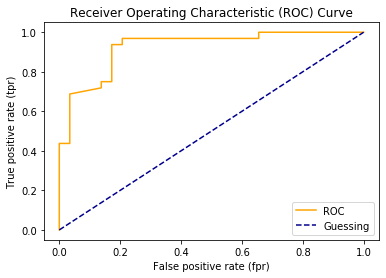

In [89]:
# Create a function for plotting ROC Curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color= "orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)